# Notação
Notação matemática para deep learning.

## Tamanhos
| Notação | Significado |
| -------------- | ------------------ |
| $m$ | Número de exemplos no dataset |
| $n_{x}$ | Tamanho da entrada  |
| $n_{y}$ | Tamanho da saída (ou número de classes)  |
| $n_{h}^{[l]}$ | Número de unidades ocultas da camada $l^{th}$ |
| $L$ | Número de camadas na rede |

**Observação**: Em um _loop_, é possível denotar $n_{x} = n_{h}^{[0]}$ e $n_{y} = n_{h}^{numero\_de\_camadas + 1}$.

## Objetos
| Notação | Significado |
| -------------- | ------------------ |
| $X \in \mathbb{R}^{n_{x} \times m}$ | Matriz de entrada |
| $x^{(i)} \in \mathbb{R}^{n_{x}}$ | Representa o vetor da columa $i^{th}$  |
| $Y \in \mathbb{R}^{n_{y} \times m}$ | Matriz de rótulos |
| $y^{(i)} \in \mathbb{R}^{n_{y}}$ | Rótulo de saída para o exemplo $i^{th}$  |
| $W^{[l]} \in \mathbb{R}^{numero\_de\_unidades\_na\_proxima\_camada \times numero\_de\_unidades\_na\_camada\_anterior}$ | É a matriz de peso, $[l]$ indica a camada |
| $b^{[l]} \in \mathbb{R}^{numero\_de\_unidades\_na\_proxima\_camada}$ | É o vetor de viés na camada $l^{th}$ |
| $\hat{y} \in \mathbb{R}^{n_{y}}$ | É o vetor de saída previsto. Também pode ser denotado como $a^{[L]}$, onde $L$ é o número de camadas na rede |
\begin{equation}
X_{n_{x} \times m} =
  \begin{bmatrix}
    \vdots & \vdots &\vdots &   & \vdots \\
    x^{(1)} & x^{(2)} & x^{(3)} & \dots  & x^{(m)} \\
    \vdots & \vdots &\vdots &   & \vdots
  \end{bmatrix}
Y_{1 \times m} =
  \begin{bmatrix}
    y^{(1)} & y^{(2)} & y^{(3)} & \dots  & y^{(m)}
  \end{bmatrix}
\end{equation}

## Outros
| Notação | Significado |
| -------------- | ------------------ |
| $(x^{(1)}, y^{(1)})$ | Exemplo de treinamento único |

# Regressão Logística
Regressão logística é um algoritmo de classificação binária, isso quer dizer que é um algoritmo de aprendizagem que usamos quando os rótulos de saída $Y$ em um problema de aprendizado supervisionado são ou $0$ ou $1$.

Dado um vetor de característica $x$, nós queremos prever $\hat{y}$, que é a probabilidade de $y$ ser igual a $1$. Em outras palavras: se $x$ é uma imagem, $\hat{y}$ nos dirá se o objeto que estamos procurando está na imagem ou não.

\begin{equation}
    \hat{y} = \underbrace{P(y = 1|x)}_{0 \leq \hat{y} \leq 1}
\end{equation}

Os parâmetros de regressão logística serão: $w$, que é um vetor de dimensão $n_{x}$, e $b$, que é um número real.

\begin{equation}
    w \in \mathbb{R}^{n_{x}} \\
    b \in \mathbb{R}
\end{equation}

Se estivessemos usando regressão linear, poderiamos declarar que $\hat{y} = w^{t} \times x + b$. O problema é que essa equação pode resultar em números muito maiores que 1 ou até mesmo números negativos, o que não é nada correto visto que nosso problema é de classificação binária. Devido isso, aplicamos a função sigmóide na equação anterior (chamaremos a equação anterior de $z$):

\begin{equation}
    \hat{y} = \sigma(\underbrace{w^{t} \times x + b}_{z})
\end{equation}

## Função sigmóide
A função sigmóide é uma função de ativação, isso quer dizer que ela atende a dois critérios:
1.  Deve estar ativa (próxima de $+1$) para entradas "corretas" e inativa (próxima a $0$) para entradas "erradas";
2.  Deve ser não linear para que a rede como um todo possa representar funções não-lineares.

O gráfico a seguir mostra o comportamento dela ($z$ nesse caso seria o eixo horizontal):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png">

Podemos perceber, por exemplo, que ela cruza o eixo vertical em $0.5$.

Sua equação é:

\begin{equation}
    \sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Podemos realizar algumas observações, como:
1.  Se $z$ é muito grande, então $e^{-z}$ será próximo de zero. Dessa forma: $\sigma(z) \thickapprox \frac{1}{1+0} \thickapprox 1$;
1.  Se $z$ é muito pequeno ou é um número negativo muito grande, então $e^{-z}$ será um número muito grande. Dessa forma: $\sigma(z) \thickapprox \frac{1}{1+numero\_grande} \thickapprox 0$;

## Função de custo
Serve para medir o quão bem os seus parâmetros $w$ e $b$ estão perfomando no conjunto de treinamento. Consiste em ser a média da função de perda (que pode ser vista logo mais abaixo) de cada exemplo treinado.
\begin{equation}
    J(w,b) = \frac{1}{m}\sum_{i=1}^{m} \mathcal{L}(\hat{y}^{i}, y^{i}) = -\frac{1}{m}\sum_{i=1}^{m} \begin{bmatrix}
    y^{i} \log \hat{y}^{i} + (1-y^{i})\log(1-\hat{y}^{i})
  \end{bmatrix}
\end{equation}

### Função de perda
Também chamada de **função de erro**, é usada para medir o quão boa é a saída prevista $\hat{y}$, quando o rótulo verdadeiro for $y$. Podemos definir a perda quando o algoritmo dá o resultado, $\hat{y}$, em relação ao rótulo verdadeiro, $y$, como:

\begin{equation}
    \mathcal{L}(\hat{y}, y) = \frac{1}{2}(\hat{y}-y)^{2}
\end{equation}

O problema dessa equação acima é que nos deparamos com o problema de otimização com múltiplas ótimos saídas, pois não será convexo. Devido a isso, nossa função de perda deverá ser:

\begin{equation}
    \mathcal{L}(\hat{y}, y) = (y \log \hat{y} + (1-y)\log(1-\hat{y}))
\end{equation}

Essa equação acima faz sentido se observarmos dois casos: $y=0$ e $y=1$.

1.  $y=1 \Longrightarrow \mathcal{L}(\hat{y}, y) = - \log \hat{y}$, quanto mais $\hat{y}$ se aproxima de $0$, $- \log \hat{y}$ cresce exponencialmente para o infinito. Porém a função sigmóide não permite que seja maior que $1$, portanto será próximo de $1$.
1.  $y=0 \Longrightarrow \mathcal{L}(\hat{y}, y) = - \log(1-\hat{y})$, quanto mais $\hat{y}$ se distancia de $0$, $\log(1-\hat{y})$ vai para infinito. Vale notar o sinal $-$ no início da equação. Logo, como a função sigmóide não permite ser menor que $0$, $\hat{y}$ será próximo de $0$. 


## Derivação
A derivada de uma função $f(x) = y$, num ponto $x = x_{0}$, é igual ao valor da tangente trigonométrica do ângulo formado pela tangente geométrica à curva representativa de $f(x) = y$, no $x = x_{0}$, ou seja, a derivada é o coeficiente angular da reta tangente ao gráfico da função no ponto $x_{0}$. Em outras palavras, podemos dizer que a derivada em um ponto de função $f(x) = y$ representa a taxa de variação instantânea do $y$ em relação a $x$ neste ponto.

### Algumas propriedades
Agora iremos ver algumas propriedades da derivação.

- i) Se $f(x) = a$, então $f'(x) = 0$
- ii) Se $f(x) = ax$, então $f'(x) = a$
- iii) (Regra do tombo) Se $f(x) = x^{a}$, então $f'(x) = a \times x^{a-1}$
- iv) (Derivada da soma) $\begin{bmatrix}f(x) + g(x)\end{bmatrix}' = f'(x) + g'(x)$
- v) $[a \times f(x)]' = a \times f'(x)$
- vi) (Regra do produto) $[f(x) \times g(x)]' = f(x)' \times g(x) + f(x) \times g(x)'$
- vii) (Regra do quociente) $\begin{bmatrix}\frac{f(x)}{g(x)}\end{bmatrix}'
= \frac{f'(x) \times g(x) - f(x) \times g'(x)}{\begin{bmatrix}g(x)\end{bmatrix}^{2}}$
- viii) (Regra da cadeia) $f$ e $g$ são funções, então $\frac{d}{dx}(f \circ g) = \frac{df}{dg} \times \frac{dg}{dx}$

### Algumas derivadas básicas

- Derivada de uma constante: $\frac{d}{dx}(c) = 0$
- Derivada de soma/subtração: $\frac{d}{dx}(z \pm w) = \frac{dz}{dx} \pm \frac{dw}{dx}$
- Produto por uma constante: $\frac{d}{dx}(c \times w) = c\frac{dw}{dx}$
- Derivada do produto: $\frac{d}{dx}(z \times w) = z\frac{dw}{dx} + w\frac{dz}{dx}$
- Derivada da divisão:  $\frac{d}{dx}(\frac{z}{w})
= \frac{w\frac{dz}{dx} - z\frac{dw}{dx}}{w^{2}}$
- Derivada de $ln$: $f(x) = ln(x)$, então $f'(x) = \frac{1}{x}$

## Gradiente decrescente
Trata-se de um método iterativo de otimização, com ele iremos aprender os parâmetros $w$ e $b$ do conjunto de treinamento.

Inicialmente atribuímos valores para $w$ e $b$, normalmente se atribui $0$, mas também pode ser valores aleatórios. Após isso será cálculado um valor referente a $w$ e $b$ que servirá para indicar a direção da descida mais íngreme ou descer o mais rápido possível. Esse passo será repetida várias vezes até convergir ao ponto ideal ou chegue o mais próximo dele.

\begin{equation}
      w := w - \alpha \frac{\partial J(w, b)}{\partial w} \\
      b := b - \alpha \frac{\partial J(w, b)}{\partial b} \\
\end{equation}

Onde:
- $\alpha$ - É a taxa de aprendizagem e controla o quão grande será o passo tomado em cada iteração do gradiente decrescente
- $\frac{\partial J(w, b)}{\partial w}$ - Derivada de $w$, representa a atualização ou mudança desejada no parâmetro $w$. O mesmo vale para $\frac{\partial J(w, b)}{\partial b}$.

Vale lembrar que a derivada é a inclinação de uma função no ponto. Dessa forma:
- Se a derivada for positiva, $w$ sobre uma subtração;
- Se a derivada for negativa, $w$ sobre uma adição;
- Se a derivada der zero, significa que chegamos no ponto crítico da função. Por se tratar de uma função convexa, existe apenas um único ponto crítico.


## Implementação
Considere $a = \hat{y}$.

### Não vetorizada
Teriamos inicialmente as variáveis inicializadas:
\begin{equation}
  J = 0, dw_{1} = 0, dw_{2} = 0, db = 0
\end{equation}

Depois declaramos um *loop* de $1$ até $m$. Seria algo como `for i = 1 to m`. Dentro desse laço, teriamos essa sequência de cálculos:
\begin{equation}
  z^{(i)} = w^{t} \times x^{(i)} + b \\
  a^{(i)} = \sigma(z^{(i)}) \\
  J += -\begin{bmatrix}y^{(i)} \log a^{(i)} + (1-y^{(i)})\log(1-a^{(i)})\end{bmatrix} \\
  dz^{(i)} = a^{(i)}-y^{(i)} \\
  dw_{1} += x_{1}^{(i)} \times dz^{(i)} \\
  dw_{2} += x_{2}^{(i)} \times dz^{(i)} \\
  db += dz^{(i)}
\end{equation}

E, após todo o laço, dividimos os valores pelo total de *loops* que realizamos:
\begin{equation}
  J = \frac{J}{m}, dw_{1} = \frac{dw_{1}}{m}, dw_{2} = \frac{dw_{2}}{m}, db = \frac{db}{m}
\end{equation}

### Vetorizada
Para implementar, iremos usar a biblioteca [*numpy*](https://www.numpy.org/), assim não precisamos realizar nenhum *loop*. Dessa forma teriamos:
\begin{equation}
  z = np.dot(w.T, x) + b \\
  a = \sigma(z^{(i)}) \\
  dz = a - y \\
  dw =\frac{1}{m} \times dz^{t} \\
  db =\frac{1}{m} \times np.sum(dz) \\
  w := w - \alpha \times dw \\
  b := b - \alpha \times db
\end{equation}

- [numpy](http://www.numpy.org/) é o pacote fundamental para computação científica com Python;
- [h5py](http://www.h5py.org/) é um pacote comum para interagir com um conjunto de dados armazenado em um arquivo H5;
- [matplotlib](https://matplotlib.org/) é uma biblioteca para construir gráficos em Python;
- [PIL](http://www.pythonware.com/products/pil/) ou [scipy](https://www.scipy.org/) poderm ser usados para testar seu modelo com outras fotos no final.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

Primeiro vamos carregar os dados:

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Agora precisamos garantir as dimensões dos dados, além de padronizá-los:

In [4]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# standardize dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

Vamos agora implementar o algoritmo:

In [5]:
def sigmoid(x):
  """Compute the sigmoid of x."""
  return 1/(1+np.exp(-x))

def initialize_with_zeros(dim):
    """This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0."""
    
    w = np.zeros((dim, 1))
    b = 0.

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
  
def propagate(w, b, X, Y):
    """Implement the cost function and its gradient for the propagation explained above."""
    
    m = X.shape[1]
    
    # Encontrar o custo (forward propagation)
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m)*np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # Encontrar o gradiente (backward propagation)
    dw = (np.dot(X, (A- Y).T))/m
    db = (np.sum(A - Y))/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """This function optimizes w and b by running a gradient descent algorithm."""
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
  
def predict(w, b, X):
    '''Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b).'''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0,i] = A[0,i] >= 0.5
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """Builds the logistic regression model by calling the function you've implemented previously."""
    
    # Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Vamos executar para vermos se está tudo funcionando como deveria:

In [6]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Exemplo de código para ajudar a escolher a taxa de apredizagem:

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



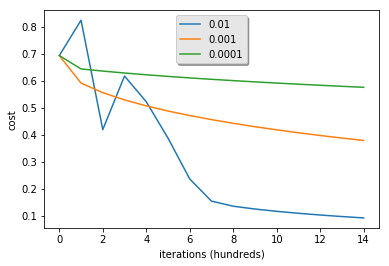

In [7]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

O código a seguir serve para testar o modelo final com outras imagens:

In [0]:
my_image = "my_image.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")